In [1]:
## We start off by importing what we need from rdkit

import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

In [2]:
## rdkit allows you to understand and extract molecular properties of molecules 
## and is the gateway into machine learning for molecules

# We can feed a smiles code to rdkit like this:
m = Chem.MolFromSmiles('Cc1ccccc1')

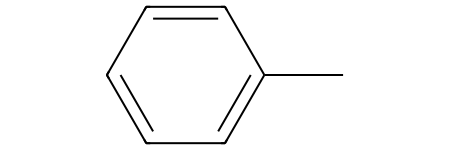

In [4]:
# m is now a rdkit molecule
m

In [6]:
# We can calculate the molecular properties of this molecule with one line of code:
vals = Descriptors.CalcMolDescriptors(m)

## The meanings of these properties are here:
# https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
vals

{'MaxAbsEStateIndex': 2.0833333333333335,
 'MaxEStateIndex': 2.0833333333333335,
 'MinAbsEStateIndex': 1.3217592592592595,
 'MinEStateIndex': 1.3217592592592595,
 'qed': 0.4588062796575455,
 'MolWt': 92.14099999999999,
 'HeavyAtomMolWt': 84.07699999999998,
 'ExactMolWt': 92.062600256,
 'NumValenceElectrons': 36,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': -0.039774526323627504,
 'MinPartialCharge': -0.06224908578199481,
 'MaxAbsPartialCharge': 0.06224908578199481,
 'MinAbsPartialCharge': 0.039774526323627504,
 'FpDensityMorgan1': 1.0,
 'FpDensityMorgan2': 1.5714285714285714,
 'FpDensityMorgan3': 1.8571428571428572,
 'BCUT2D_MWHI': 13.782105281259431,
 'BCUT2D_MWLOW': 10.2446262174219,
 'BCUT2D_CHGHI': 1.7152546995077484,
 'BCUT2D_CHGLO': -1.8223238719751815,
 'BCUT2D_LOGPHI': 1.9162789955764012,
 'BCUT2D_LOGPLOW': -1.6221555927559288,
 'BCUT2D_MRHI': 5.11182720852277,
 'BCUT2D_MRLOW': 1.475756642372446,
 'AvgIpc': 1.6856161633204378,
 'BalabanJ': 3.0214653097240864,
 'BertzCT': 129

In [7]:
# There are also some properties that must be calculated explicitly

# The below calculates the partial charge using the Gasteiger method
AllChem.ComputeGasteigerCharges(m)
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.039774526323627504

In [10]:
## Function to take molecule SMILES code, get the properties from rdkit and return a dataframe with all properties

# Function takes as input a SMILEs code
def getallproperties(smiles):
    ## We calculate all the molecular descriptors
    vals = Descriptors.CalcMolDescriptors(smiles)
    
    ## Get the names of the property and the value for the property and add them to a list
    propertynames = []
    molecularproperties = []
    
    for item in vals:
        propertynames.append(item)
        molecularproperties.append(vals[item])
    
    # Partial charge is done differently
    AllChem.ComputeGasteigerCharges(molecule)
    partial_charge = molecule.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')    
    
    # Append partial charge to the list of properties as well
    propertynames.append("Partial_charge")
    molecularproperties.append(partial_charge)
        
    # Make a dataframe with all these properties in that we return
    propertiesdataframe = pd.DataFrame([molecularproperties])
    propertiesdataframe.columns = propertynames
    
    return(propertiesdataframe)

In [12]:
## Load some example data from the e-tongue
etonguedata = pd.read_csv("./etongue.csv")

In [13]:
etonguedata.head()

,Bitterness Concentration,Drug,SMILES
0,9.115570e-05,Amlodipine besylate,CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)C...
1,3.749328e-02,Brigatinib,CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...
2,5.825595e-03,Chlorpheniramine maleate,CN(C)CCC(C1=CC=C(C=C1)Cl)C2=CC=CC=N2.C(=C\C(=O...
3,3.050000e-08,Furosemide,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl
4,1.475528e-02,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O


In [19]:
descriptorlist = []
## Loop through the dataframe of SMILES codes
for smiles_code in etonguedata["SMILES"].tolist():
    
    ## Convert SMILES into molecule
    molecule = Chem.MolFromSmiles(smiles_code)
    
    ## We give the molecule to the function we wrote above
    descriptors = getallproperties(molecule)
    ## Add the dataframe we get from the function to a list
    descriptorlist.append(descriptors)

# Merge the list of datafames and join them all together
combined_descriptors = pd.concat(descriptorlist)
combined_descriptors.reset_index(inplace = True)
combined_descriptors = combined_descriptors.drop("index", axis =1)

In [20]:
## We now have a dataframe with all the properties for all the SMILES we gave it
combined_descriptors.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Partial_charge
0,12.881264,12.881264,0.074074,-4.002824,0.233991,567.060,535.812,566.148965,206,0,...,0,0,0,0,0,0,0,1,0,-0.030523
1,12.792871,12.792871,0.365445,-2.504254,0.352192,584.105,544.793,583.259138,214,0,...,0,0,0,0,0,0,0,0,0,-0.013281
2,9.553611,9.553611,0.320247,-1.257037,0.702606,390.867,367.683,390.134635,144,0,...,0,0,0,0,0,0,0,0,0,-0.013695
3,11.349448,11.349448,0.162551,-4.105997,0.768936,330.749,319.661,330.007720,112,0,...,1,0,0,0,0,0,0,0,0,-0.023477
4,10.762425,10.762425,0.418426,-0.771658,0.821600,206.285,188.141,206.130680,82,0,...,0,0,0,0,0,0,0,0,0,-0.062456


In [26]:
## Merge this with the original dataframe
merged_dataframe = pd.concat([etonguedata, combined_descriptors], axis =1)

In [27]:
merged_dataframe.head()

,Bitterness Concentration,Drug,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Partial_charge
0,9.115570e-05,Amlodipine besylate,CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)C...,12.881264,12.881264,0.074074,-4.002824,0.233991,567.060,535.812,...,0,0,0,0,0,0,0,1,0,-0.030523
1,3.749328e-02,Brigatinib,CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(...,12.792871,12.792871,0.365445,-2.504254,0.352192,584.105,544.793,...,0,0,0,0,0,0,0,0,0,-0.013281
2,5.825595e-03,Chlorpheniramine maleate,CN(C)CCC(C1=CC=C(C=C1)Cl)C2=CC=CC=N2.C(=C\C(=O...,9.553611,9.553611,0.320247,-1.257037,0.702606,390.867,367.683,...,0,0,0,0,0,0,0,0,0,-0.013695
3,3.050000e-08,Furosemide,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,11.349448,11.349448,0.162551,-4.105997,0.768936,330.749,319.661,...,1,0,0,0,0,0,0,0,0,-0.023477
4,1.475528e-02,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,10.762425,10.762425,0.418426,-0.771658,0.821600,206.285,188.141,...,0,0,0,0,0,0,0,0,0,-0.062456


In [26]:
## Save the new dataframe with descriptors.
merged_dataframe.to_csv("Etongue_SMILES_rdkit.csv")